# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx
import numpy as np

# Load data

In [2]:
df = pd.read_csv('raw/hki_liikennemaarat.csv', delimiter = ';')

In [3]:
df

,piste,nimi,x_gk25,y_gk25,suunta,aika,vuosi,ha,pa,ka,ra,la,mp,rv,autot
0,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2010,60,4,1,0,4,0,0,69
1,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2010,35,3,1,0,2,0,0,41
2,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2010,17,1,0,0,1,0,0,19
3,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2010,17,1,0,0,1,0,0,19
4,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2010,36,2,0,0,2,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67027,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,1900,2023,135,8,0,0,0,5,0,143
67028,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2000,2023,100,4,0,0,0,0,0,104
67029,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2100,2023,50,2,0,0,0,0,0,52
67030,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2200,2023,25,1,0,0,0,0,0,26


In [4]:
df.aika.unique()

array([   0,  100,  200,  300,  400,  500,  600,  615,  630,  645,  700,
        715,  730,  745,  800,  815,  830,  845,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1515, 1530, 1545, 1600, 1615, 1630, 1645, 1700,
       1715, 1730, 1745, 1800, 1900, 2000, 2100, 2200, 2300], dtype=int64)

In [5]:
# Understanding column meanings
(df[['ha','pa', 'ka', 'ra', 'la', 'mp', 'rv']].sum(axis = 1) == df['autot'])

0         True
1         True
2         True
3         True
4         True
         ...  
67027    False
67028     True
67029     True
67030     True
67031     True
Length: 67032, dtype: bool

In [6]:
df.suunta.unique()

array([ 1.,  2., nan])

In [7]:
df.columns

Index(['piste', 'nimi', 'x_gk25', 'y_gk25', 'suunta', 'aika', 'vuosi', 'ha',
       'pa', 'ka', 'ra', 'la', 'mp', 'rv', 'autot'],
      dtype='object')

In [8]:
df.rename(columns={

    "piste": "ID", # of the counting point
    "nimi": "Street_name", #/ location of the counting point
    # x_gk25 x coordinate in ETRS-GK25 coordinate system
    # y_gk25 y coordinate in ETRS-GK25 coordinate system
    "suunta": "direction", #(direction 1 is towards city centre; 2 towards west ?)
    "aika": "time", # (hour; at 6am-9am and 3pm-6pm 15 minutes)
    "vuosi": "year",
    "ha" : 'passenger cars', #(henkilöautot)
    "pa" : "vans", #(pakettiautot)
    "ka" : "trucks", #(kuorma-autot)
    "ra" : "lorries", #(rekka-autot) #Lorry is the British word used to refer to a truck or a large vehicle meant to transport cargo
    "mp" : "motorbikes", #(moottoripyörät)
    "rv" : "trams", #(raitiovaunut)
    "autot": "cars" # This is the sum of all previous field

}, inplace=True)

In [9]:
df['TR_AADT'] = df['trucks'] + df['lorries']
df['AADT'] = df['cars']

In [10]:
df

,ID,Street_name,x_gk25,y_gk25,direction,time,year,passenger cars,vans,trucks,lorries,la,motorbikes,trams,cars,TR_AADT,AADT
0,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,0,2010,60,4,1,0,4,0,0,69,1,69
1,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,100,2010,35,3,1,0,2,0,0,41,1,41
2,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,200,2010,17,1,0,0,1,0,0,19,0,19
3,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,300,2010,17,1,0,0,1,0,0,19,0,19
4,A01,LAUTTASAAREN SILTA,25494426,6672169,1.0,400,2010,36,2,0,0,2,0,0,40,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67027,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,1900,2023,135,8,0,0,0,5,0,143,0,143
67028,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2000,2023,100,4,0,0,0,0,0,104,0,104
67029,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2100,2023,50,2,0,0,0,0,0,52,0,52
67030,F06,UUSI PORVOONTTIE,25512755,6683217,2.0,2200,2023,25,1,0,0,0,0,0,26,0,26


In [11]:
df[(df.ID == 'F05') & (df.year == 2022)].direction.value_counts()

direction
1.0    42
2.0    42
Name: count, dtype: int64

In [12]:
df[(df.ID == 'F05') & (df.year == 2022)].x_gk25.value_counts()

x_gk25
25513920    84
Name: count, dtype: int64

In [13]:
# Each ID has both directions
for k in df.ID.unique():
    if (df[df.ID==k].direction.unique() !=  [1.,2.]).all():
        print(k, df[df.ID==k].direction.unique())

C18 [nan]


In [14]:
# Groupby ID and year ; merge over times and direction

df = df.groupby(['ID', 'year']).agg(
    AADT = ('AADT', 'sum'),
    TR_AADT = ('TR_AADT', 'sum'),
    x  =('x_gk25', lambda x : x.iloc[0]),
    y  =('y_gk25', lambda x : x.iloc[0]),
    raw_name = ('Street_name', lambda x : x.iloc[0]),
    # There is only one geometry for both directions
    #raw_direction = ('direction', lambda x : x.iloc[0])
)

In [15]:
# Because we summed both direction
df['raw_oneway'] = False
# Except for this one, we don't know
df.loc['C18', 'raw_oneway'] = np.nan

C:\Users\xbonnema\AppData\Local\Temp\ipykernel_11604\952005064.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc['C18', 'raw_oneway'] = np.nan


In [16]:
# Create Geodataframe and convert coordinates
gdf = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.x, df.y),
    crs = 'epsg:3879'
).to_crs('epsg:4326')

(24.784812927246097, 25.31237127126479, 60.06523622438594, 60.32711770451033)

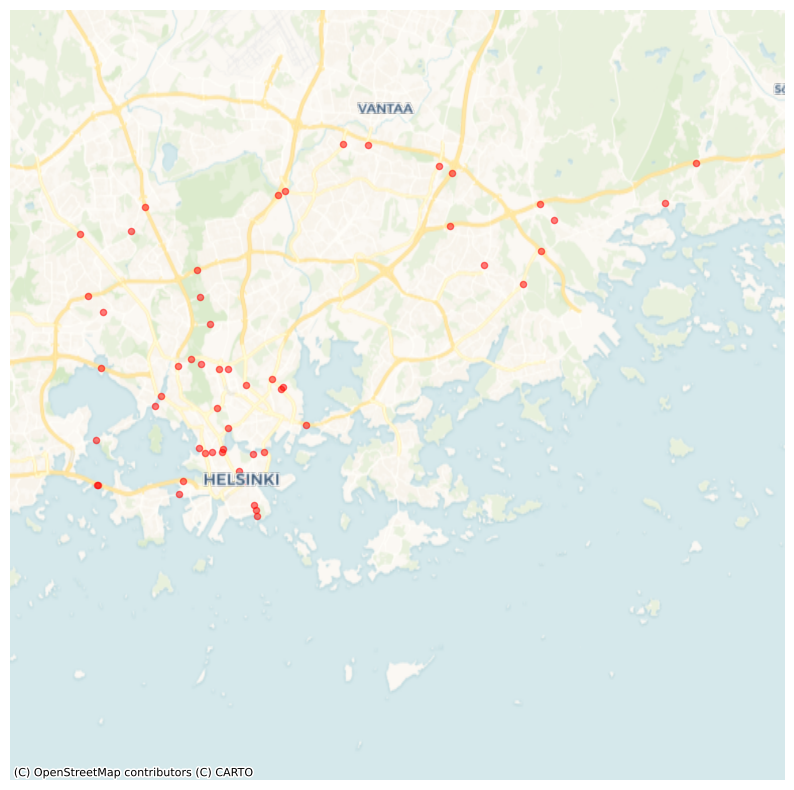

In [17]:
# Plot sensors
ax = gdf.drop_duplicates('geometry').plot(color = 'r', markersize = 20, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

plt.axis('auto')
# Remove lat lon
plt.axis('off')

In [18]:
gdf.drop(['x', 'y'], axis = 1, inplace=True)

# Map matching with OSM

In [19]:
gdf.index.levels[0].size

57

In [20]:
gdf.geometry.unique().size 

54

In [21]:
gdf_unique = gdf.reset_index().drop_duplicates(subset = ['ID']).set_index('ID')

In [22]:
# This should be done with gdf prior to join

import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import points_matching

In [23]:
gdf_unique = points_matching(gdf_unique)

City downloaded


 14%|█▍        | 8/57 [00:00<00:00, 75.78it/s]

Value Error - No roads found nearby current index


 82%|████████▏ | 47/57 [00:00<00:00, 86.26it/s]

Value Error - No roads found nearby current index


100%|██████████| 57/57 [00:00<00:00, 85.75it/s]

We failed to match 2 sensors
...on a total of 57 sensors


In [24]:
gdf_unique[gdf_unique.osmid.isna()]
# Seem very far away from nearby roads

,year,AADT,TR_AADT,raw_name,raw_oneway,geometry,osm_name,osm_type,osm_lanes,osm_oneway,osm_distance,osm_maxspeed,osmid
ID,,,,,,,,,,,,,
A09,2010,38641,1170,HAKANIEMEN SILTA,False,POINT (24.95741 60.17691),NaN,NaN,NaN,NaN,NaN,NaN,NaN
C10,2010,28518,1553,VALIMOT.+KIRKKOT.,False,POINT (24.97202 60.26569),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Update results in gdf
gdf = gdf.join(
    gdf_unique[['osm_name',	'osm_type',	'osm_lanes','osm_oneway', 'osm_distance', 'osm_maxspeed', 'osmid']] ,
         on = 'ID',
         how = 'inner')

In [26]:
gdf[['raw_name', 'osm_name']].drop_duplicates().dropna()[:25]

,,raw_name,osm_name
ID,year,,
A01,2010,LAUTTASAAREN SILTA,Lauttasaaren silta
A02,2010,LAPINLAHDEN SILTA,Länsiväylä
A03,2010,MERIKANNONTIE,Merikannontie
A04,2010,MECHELININKATU,Mechelininkatu
A05,2010,RUNEBERGINKATU,Runeberginkatu
A06,2010,TÖÖLÖNKATU,Töölönkatu
A07,2010,MANNERHEIMINTIE,Mannerheimintie
A08,2010,PITKÄSILTA,Pitkäsilta
B01,2010,LÄNSIVÄYLÄ,Länsiväylä


# Final saving

In [27]:
gdf.columns

Index(['AADT', 'TR_AADT', 'raw_name', 'raw_oneway', 'geometry', 'osm_name',
       'osm_type', 'osm_lanes', 'osm_oneway', 'osm_distance', 'osm_maxspeed',
       'osmid'],
      dtype='object')

In [28]:
gdf.index.levels[1]

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023],
      dtype='int64', name='year')

In [ ]:
from validate_dataset import validate_dataset

gdf = validate_dataset(gdf)

In [30]:
for year in range(2015, 2024):
    gdf.loc[slice(None), year, :].to_file(f'treated/Helsinki_AADT_{year}.geojson', index = False)